<a href="https://colab.research.google.com/github/worksofindustry/jupyter_notebooks/blob/main/Multiclass_Classification_In_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [28]:
"Train Data: " + str(len(train_data)) +  " \ " + "Test Data" + str(len(test_data))

'Train Data: 8982 \\ Test Data2246'

In [29]:
# # Decoding newswires back to test
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
train_labels[10]

3

In [30]:
# Vectorize Data By Encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
# Vectorize Labels
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
# Model Definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) #number of words
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #each output will encode 46 different output classes with a predicted probability

In [33]:
# Compile the Model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy', # measures the difference between probability distribution and output by the network and the true distribution of the labels. 
metrics=['accuracy'])

In [34]:
# Create a validation Set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
# Train the Model for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.4718 - accuracy: 0.5506 - val_loss: 1.6493 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3603 - accuracy: 0.7136 - val_loss: 1.2957 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0267 - accuracy: 0.7795 - val_loss: 1.1647 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8132 - accuracy: 0.8247 - val_loss: 1.0573 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6493 - accuracy: 0.8673 - val_loss: 0.9834 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5174 - accuracy: 0.8920 - val_loss: 0.9488 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4189 - accuracy: 0.9116 - val_loss: 0.9236 - val_accuracy: 0.8150
Epoch 8/20
16

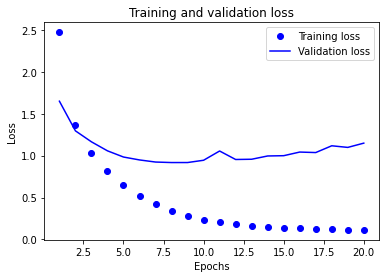

In [36]:
# Plot the Training and Validation Loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

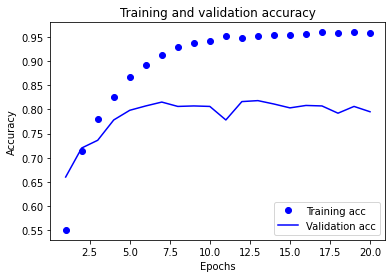

In [42]:
# Plotting the training and validation accuracy
plt.clf() # clear previous results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
# The network begins to overfit at 9 epochs, let's train a new network for nine epochs and reevaluate
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
# [0.9565213431445807, 0.79697239536954589] Accuracy of ~80%

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.5998 - accuracy: 0.5408 - val_loss: 1.7291 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.4090 - accuracy: 0.7119 - val_loss: 1.2965 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0397 - accuracy: 0.7843 - val_loss: 1.1236 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8097 - accuracy: 0.8295 - val_loss: 1.0177 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6381 - accuracy: 0.8692 - val_loss: 0.9478 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5062 - accuracy: 0.8954 - val_loss: 0.9168 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4030 - accuracy: 0.9173 - val_loss: 0.9053 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

Generating Predictions On New Data

In [47]:
predictions = model.predict(x_test)
predictions[0].shape # each entry in predictions is a vector of length 46 (46,)
np.sum(predictions[0])

1.0